# Question 1: Given some sample data, write a program to answer the following:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

a. Think about what could be going wrong with our calculation.

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Load dataset

shopify_ds = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv", parse_dates = ['created_at'])
shopify_ds

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [28]:
shopify_ds.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11


## Exploratory Data Analysis and Descriptive Statistics

In [29]:
shopify_ds.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


- Mean order value ($3145.12) is crazy high for a sneaker store considering even if the most expensive sneakers are sold from the most sought after brands.

In [30]:
shopify_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


- No nul values in the dataset!

In [31]:
shopify_ds['shop_id'].nunique()

100

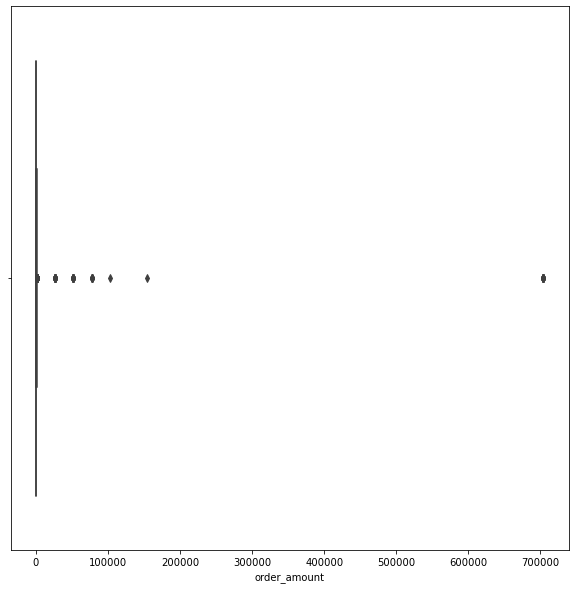

In [32]:
fig = plt.figure(figsize = (10, 10))
sns.boxplot(shopify_ds['order_amount']);

- Looks like there are a lot of outliers that are affecting the average order value. Lets find out those.

In [33]:
data = shopify_ds['order_amount']

# Function to Detect Outliers
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    data_std = np.std(data)
    data_mean = np.mean(data)
    anomaly_cut_off = data_std * 3
    
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print("Lower Limit:", lower_limit)
    print("Upper Limit:", upper_limit)
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

outliers = find_anomalies(data)
print("Outliers:", outliers)

Lower Limit: -120690.10466525992
Upper Limit: 126980.36066525991
Outliers: [704000, 704000, 704000, 154350, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000, 704000]


- Any value that is beyond 3 standard deviations from the mean is an outlier. Above we have a list of order amounts that fall in the outlier region and because of them the AOV is high for an affordable product like shoes.

In [34]:
shopify_ds.loc[shopify_ds['order_amount'].isin(outliers)]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00


Interesting findings here.

- All of the outliers amounts are transactions done by two specific users.
- They are buying shoes in bulk; 2000 pairs of shoes by user_id 607 and 6 pairs of shoes by user_id 878 which is shooting up the AOV.
- We can still consider user id 878's order as legitimate as it is just one transaction using debit card. However, the amount is still suspicious enough to spend in one go.
- User id 607 has purchased sneakers in bulk using a credit card, which is a huge red flag. This is likely a case of fraud. Let's check the amount spent by this user.

In [51]:
shopify_ds_user_amount = pd.DataFrame({'mean_amount': shopify_ds.groupby('user_id')['order_amount'].mean()}).reset_index()
shopify_ds_user_amount.sort_values(by = 'mean_amount', ascending = False).head(30)

,user_id,mean_amount
0,607,704000.000000
179,878,14266.909091
67,766,8007.600000
135,834,6019.000000
216,915,5785.142857
263,962,5743.428571
76,775,5069.625000
118,817,5061.750000
229,928,5041.750000
156,855,4759.705882


- A massive mean amount of $704,000 just by one user using a credit card. That is definitley a case of credit card fraud.
- Second and third highest spending by users 878 and 766 is also suspicious which we will take a look at later.

In [36]:
shopify_ds[shopify_ds['user_id'] == 607]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00


- User ID 607 made 17 transactions and each time purchased 2000 shoes from shop id 42 worth 70400 dollars, that is total expenditure of $11.96m with a credit card. Fraud alert.

Let's remove user Id 607 and plot again.

In [37]:
subset_df = shopify_ds_user_amount[shopify_ds_user_amount['user_id'] != 607]
subset_df.head()

,user_id,mean_amount
1,700,299.375000
2,701,397.076923
3,702,406.615385
4,703,380.687500
5,704,275.285714


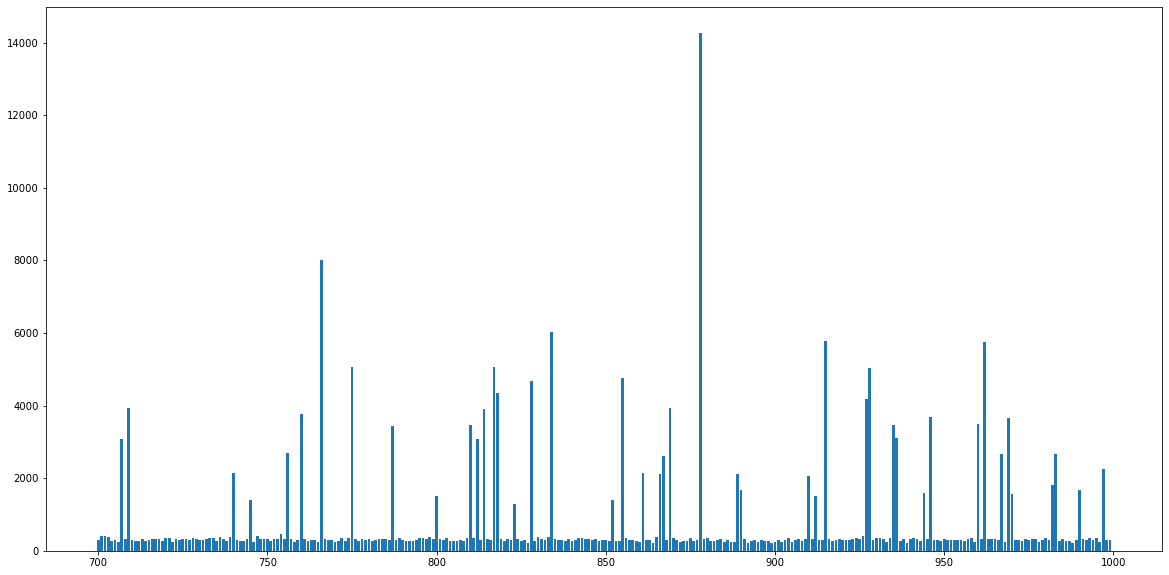

In [38]:
fig = plt.figure(figsize = (20, 10))
plt.bar(subset_df['user_id'], subset_df['mean_amount']);

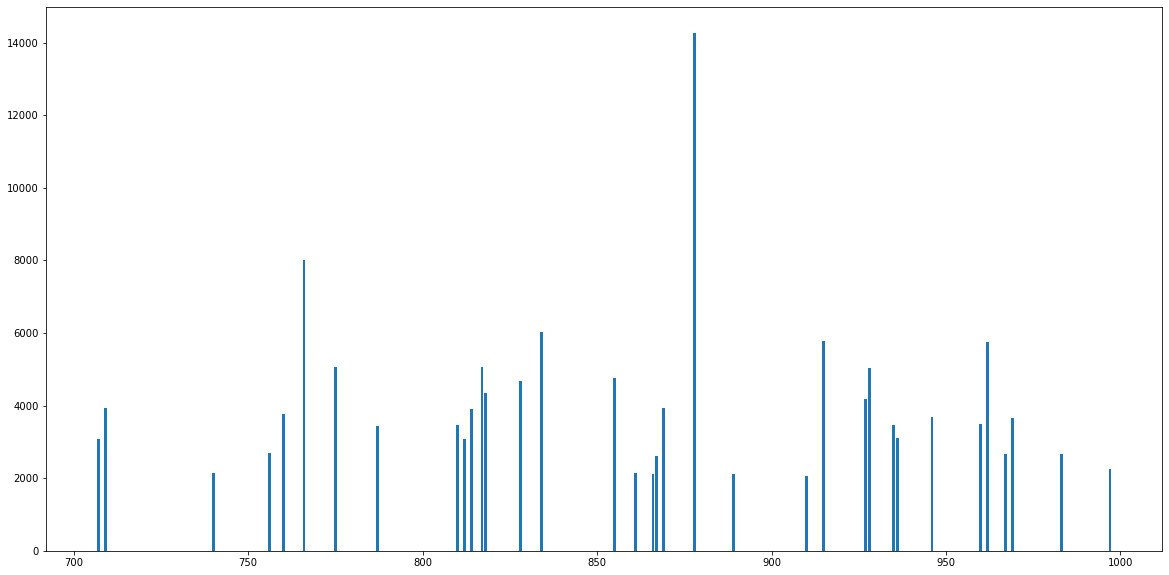

In [39]:
# Plot for users with mean amount greater tham $2000

subset_df = subset_df[subset_df['mean_amount'] > 2000]
fig = plt.figure(figsize = (20, 10))
plt.bar(subset_df['user_id'], subset_df['mean_amount']);

- User id 878 and 766's spending amount are the ones that stand out in this graph. Let's check.

In [40]:
subset_df[subset_df['user_id'] == 878]

,user_id,mean_amount
179,878,14266.909091


In [41]:
shopify_ds[shopify_ds['user_id'] == 878]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
818,819,60,878,354,2,debit,2017-03-27 12:42:01
927,928,2,878,94,1,credit_card,2017-03-10 18:09:05
1575,1576,47,878,290,2,cash,2017-03-07 22:06:51
1833,1834,74,878,153,1,credit_card,2017-03-06 17:33:21
2011,2012,87,878,298,2,cash,2017-03-04 14:14:35
3474,3475,20,878,254,2,cash,2017-03-17 03:43:03
3647,3648,98,878,266,2,cash,2017-03-06 01:49:57
4106,4107,26,878,176,1,debit,2017-03-20 04:32:18
4215,4216,80,878,435,3,debit,2017-03-05 03:07:32


- User id 878 has a very high one time spending which is through a debit card, shop id is 78.

In [42]:
shopify_ds[shopify_ds['user_id'] == 766]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1132,1133,81,766,354,2,cash,2017-03-07 15:43:40
1278,1279,70,766,346,2,credit_card,2017-03-15 20:05:22
1464,1465,4,766,128,1,debit,2017-03-22 23:36:53
1691,1692,84,766,459,3,debit,2017-03-09 01:39:10
2115,2116,63,766,544,4,debit,2017-03-14 17:28:31
2169,2170,4,766,256,2,debit,2017-03-20 23:10:22
2936,2937,69,766,262,2,cash,2017-03-17 22:22:59
3422,3423,20,766,381,3,cash,2017-03-30 17:36:08
3724,3725,78,766,77175,3,credit_card,2017-03-16 14:13:26
3977,3978,55,766,171,1,debit,2017-03-10 09:54:00


- User 766 also has a one time high spending at shop id 78.
- Shop id 78 clearly looks suspicious, let us check

In [43]:
shopify_ds[shopify_ds['shop_id'] == 78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 07:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 09:27:20


In [44]:
shopify_ds_shop = pd.DataFrame({'mean_amount': shopify_ds.groupby('shop_id')['order_amount'].mean()}).reset_index()
shopify_ds_shop

,shop_id,mean_amount
0,1,308.818182
1,2,174.327273
2,3,305.250000
3,4,258.509804
4,5,290.311111
...,...,...
95,96,330.000000
96,97,324.000000
97,98,245.362069
98,99,339.444444


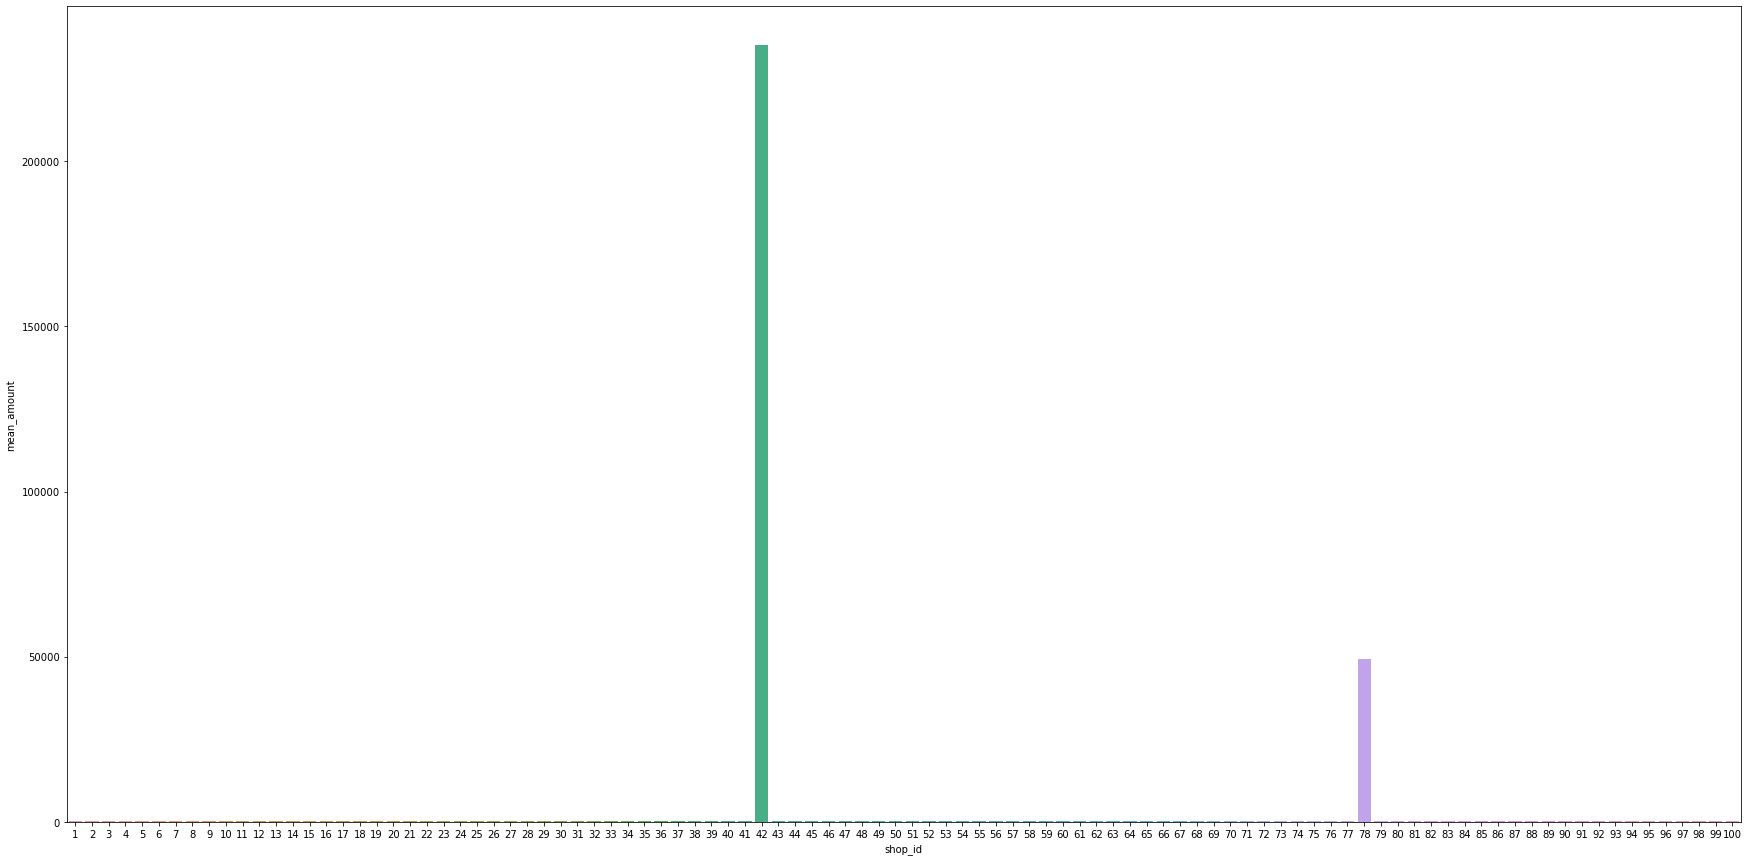

In [45]:
fig = plt.figure(figsize = (30, 15))
sns.barplot(x = 'shop_id', y = 'mean_amount', data = shopify_ds_shop);

- Another case of fraud at shop with id 42 along with 78.

In [46]:
shopify_ds[shopify_ds['shop_id'] == 42]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
834,835,42,792,352,1,cash,2017-03-25 21:31:25
835,836,42,819,704,2,cash,2017-03-09 14:15:15
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45
979,980,42,744,352,1,debit,2017-03-12 13:09:04


- Let's remove the 2 fraud cases: user id 607 and shop id 78 and observe the data again.

In [47]:
clean_df = shopify_ds[shopify_ds['user_id' ]!= 607]
clean_df = clean_df[clean_df['shop_id'] != 78]
clean_df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [48]:
clean_df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


b. What metric would you report for this dataset?
- Mean can still be used because we have identified and isolated the fraud cases and outliers.

c.  What is its value?
- $302.58

## Question 2: Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

#### Q1. How many orders were shipped by Speedy Express in total?

<br> SELECT COUNT(OrderID)
<br> FROM Orders O, Shippers S
<br> WHERE O.ShipperID = S.ShipperID AND S.ShipperName = 'Speedy Express'

<br> Ans: 54

#### Q2. What is the last name of the employee with the most orders?

<br> SELECT e.LastName, count(*) as Most_Orders
<br> FROM Employees e, Orders o
<br> WHERE e.EmployeeID = o.EmployeeID
<br> GROUP BY e.LastName
<br> ORDER BY Most_Orders DESC LIMIT 1

<br> Ans: Peacock (40 orders)

#### Q3. What product was ordered the most by customers in Germany?

<br> SELECT ProductName, MaxOrders 
<br> FROM (SELECT ProductID, MAX(NetOrders) as MaxOrders 
<br>       FROM (Select *, Count(DISTINCT OrderID) AS NetOrders  
<br>           FROM (SELECT *
<br>               FROM Orders o Inner Join OrderDetails od
<br>               ON o.OrderID = od.OrderID
<br>               WHERE CustomerID IN
<br>                                  (SELECT CustomerID 
<br>                                   FROM Customers WHERE Country = 'Germany'))
<br>  GROUP BY ProductID
<br>  ORDER BY COUNT(DISTINCT OrderID) DESC)) t1 Inner Join Products p
<br>  WHERE t1.ProductID = p.ProductID



<br> Ans: Gorgonzola Telino (number of orders are 5)